In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")


In [57]:
dataset=pd.read_csv('Customers.csv')

In [58]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [59]:
plt.scatter(dataset['Annual Income (k$)'],dataset['Spending Score (1-100)'])

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(dataset[['Annual Income (k$)']])
dataset['Annual Income (k$)'] = scaler.transform(dataset[['Annual Income (k$)']])

In [61]:
scaler.fit(dataset[['Spending Score (1-100)']])
dataset['Spending Score (1-100)'] = scaler.transform(dataset[['Spending Score (1-100)']])

In [62]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,0.000000,0.387755
1,2,Male,21,0.000000,0.816327
2,3,Female,20,0.008197,0.051020
3,4,Female,23,0.008197,0.775510
4,5,Female,31,0.016393,0.397959


In [108]:
x = dataset.iloc[:,[3,4]].values

In [109]:
x

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ],
       [0.01639344, 0.39795918],
       [0.01639344, 0.76530612],
       [0.02459016, 0.05102041],
       [0.02459016, 0.94897959],
       [0.03278689, 0.02040816],
       [0.03278689, 0.7244898 ],
       [0.03278689, 0.13265306],
       [0.03278689, 1.        ],
       [0.04098361, 0.14285714],
       [0.04098361, 0.7755102 ],
       [0.04098361, 0.12244898],
       [0.04098361, 0.79591837],
       [0.04918033, 0.34693878],
       [0.04918033, 0.66326531],
       [0.06557377, 0.28571429],
       [0.06557377, 0.98979592],
       [0.07377049, 0.34693878],
       [0.07377049, 0.73469388],
       [0.08196721, 0.04081633],
       [0.08196721, 0.73469388],
       [0.10655738, 0.13265306],
       [0.10655738, 0.82653061],
       [0.10655738, 0.31632653],
       [0.10655738, 0.6122449 ],
       [0.1147541 , 0.30612245],
       [0.1147541 , 0.87755102],
       [0.

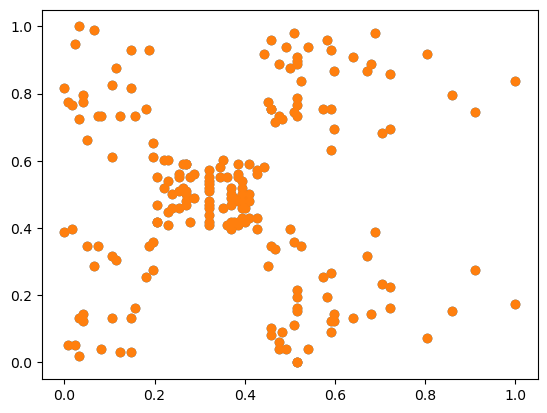

In [111]:
plt.scatter(dataset['Annual Income (k$)'],dataset['Spending Score (1-100)'])
plt.show()

In [112]:

from sklearn.cluster import KMeans
wcss=[]
for i in range(1,21):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

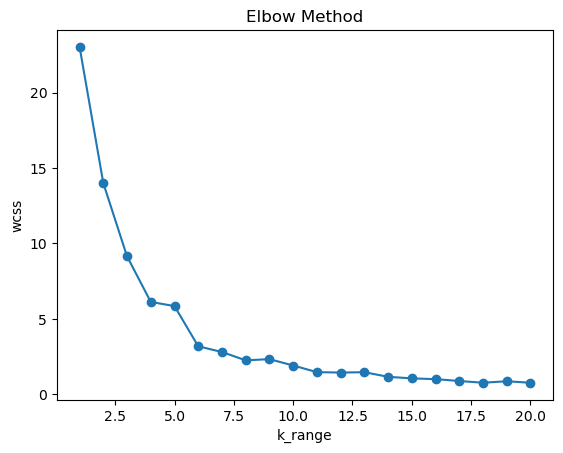

In [114]:
k_range = range(1,21)
plt.plot(k_range,wcss,marker='o')
plt.title('Elbow Method')
plt.xlabel('k_range')
plt.ylabel('wcss')
plt.show()

In [115]:
k_mean = KMeans(n_clusters=5)
k_mean

KMeans(n_clusters=5)

In [116]:
Label_or_predicted = k_mean.fit_predict(x)

In [117]:
Label_or_predicted

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0,
       2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [118]:
dataset['cluster'] = Label_or_predicted

In [119]:
dataset.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,0.000000,0.387755,2
1,2,Male,21,0.000000,0.816327,4
2,3,Female,20,0.008197,0.051020,2
3,4,Female,23,0.008197,0.775510,4
4,5,Female,31,0.016393,0.397959,2
5,6,Female,22,0.016393,0.765306,4
6,7,Female,35,0.024590,0.051020,2
7,8,Female,23,0.024590,0.948980,4
8,9,Male,64,0.032787,0.020408,2
9,10,Female,30,0.032787,0.724490,4


In [120]:
d_1 = dataset[dataset.cluster==0]
d_2 = dataset[dataset.cluster==1]
d_3 = dataset[dataset.cluster==2]
d_4 = dataset[dataset.cluster==3]
d_5 = dataset[dataset.cluster==4]

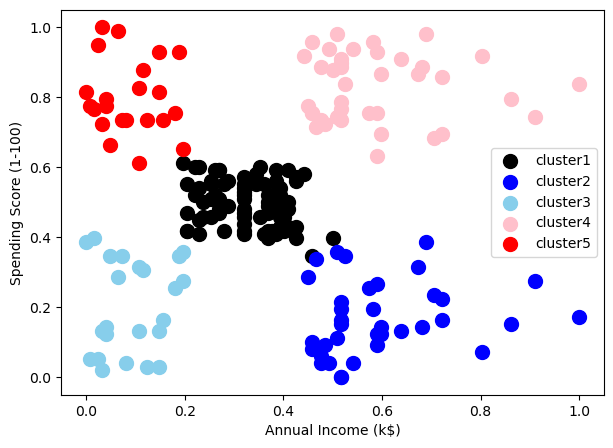

In [121]:
plt.figure(figsize=(7,5))
plt.scatter(d_1['Annual Income (k$)'],d_1['Spending Score (1-100)'],c='black',s=100,label='cluster1')
plt.scatter(d_2['Annual Income (k$)'],d_2['Spending Score (1-100)'],c='blue',s=100,label='cluster2')
plt.scatter(d_3['Annual Income (k$)'],d_3['Spending Score (1-100)'],c='skyblue',s=100,label='cluster3')
plt.scatter(d_4['Annual Income (k$)'],d_4['Spending Score (1-100)'],c='pink',s=100,label='cluster4')
plt.scatter(d_5['Annual Income (k$)'],d_5['Spending Score (1-100)'],c='red',s=100,label='cluster5')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [122]:
k_mean.cluster_centers_

array([[0.32858607, 0.49706633],
       [0.59631148, 0.16921769],
       [0.09265859, 0.20319432],
       [0.58638083, 0.82783883],
       [0.08792846, 0.79962894]])

In [123]:
k_mean.cluster_centers_[0][1]

0.4970663265306122

In [126]:
print(f"Cordinates of Cluseter i :     x           y \n")
for i in range(len(k_mean.cluster_centers_)):
    print(f"Cordinates of Cluseter {i} : {k_mean.cluster_centers_[i]} ")
 

Cordinates of Cluseter i :     x           y 

Cordinates of Cluseter 0 : [0.32858607 0.49706633] 
Cordinates of Cluseter 1 : [0.59631148 0.16921769] 
Cordinates of Cluseter 2 : [0.09265859 0.20319432] 
Cordinates of Cluseter 3 : [0.58638083 0.82783883] 
Cordinates of Cluseter 4 : [0.08792846 0.79962894] 


<Figure size 700x500 with 0 Axes>

<Figure size 700x500 with 0 Axes>

<Figure size 700x500 with 0 Axes>

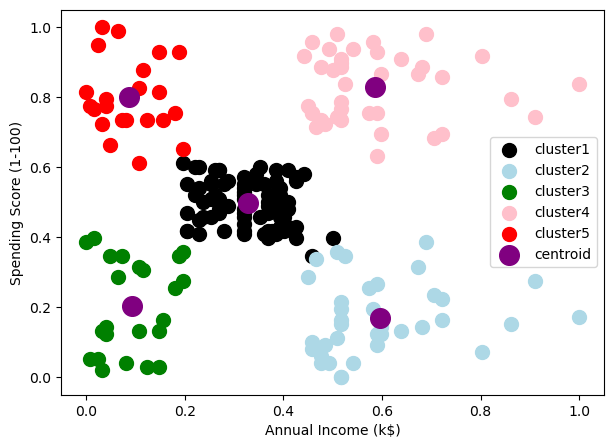

In [131]:
plt.figure(figsize=(7,5))
plt.scatter(d_1['Annual Income (k$)'],d_1['Spending Score (1-100)'],c='black',s=100,label='cluster1')
plt.scatter(d_2['Annual Income (k$)'],d_2['Spending Score (1-100)'],c='lightblue',s=100,label='cluster2')
plt.scatter(d_3['Annual Income (k$)'],d_3['Spending Score (1-100)'],c='green',s=100,label='cluster3')
plt.scatter(d_4['Annual Income (k$)'],d_4['Spending Score (1-100)'],c='pink',s=100,label='cluster4')
plt.scatter(d_5['Annual Income (k$)'],d_5['Spending Score (1-100)'],c='red',s=100,label='cluster5')

plt.scatter(k_mean.cluster_centers_[:,0],k_mean.cluster_centers_[:,1],c='purple',s=200,label='centroid')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [132]:
import pandas as pd

In [133]:
df = pd.read_csv('CC_GENERAL.csv')

In [134]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [135]:
df_corr = df.drop(columns=['CUST_ID']).corr()
print(df_corr)


                                   BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.322412   0.181261   
BALANCE_FREQUENCY                 0.322412           1.000000   0.133674   
PURCHASES                         0.181261           0.133674   1.000000   
ONEOFF_PURCHASES                  0.164350           0.104323   0.916845   
INSTALLMENTS_PURCHASES            0.126469           0.124292   0.679896   
CASH_ADVANCE                      0.496692           0.099388  -0.051474   
PURCHASES_FREQUENCY              -0.077944           0.229715   0.393017   
ONEOFF_PURCHASES_FREQUENCY        0.073166           0.202415   0.498430   
PURCHASES_INSTALLMENTS_FREQUENCY -0.063186           0.176079   0.315567   
CASH_ADVANCE_FREQUENCY            0.449218           0.191873  -0.120143   
CASH_ADVANCE_TRX                  0.385152           0.141555  -0.067175   
PURCHASES_TRX                     0.154338           0.189626   0.689561   
CREDIT_LIMIT

In [136]:
df.shape

(8950, 18)

In [137]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [138]:
len(df.MINIMUM_PAYMENTS.unique())

8637

In [139]:
import seaborn as sns

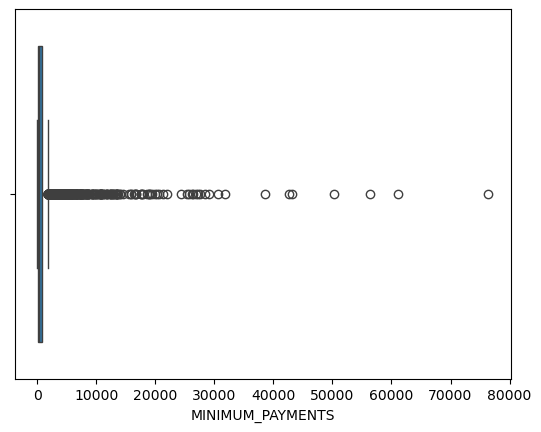

In [140]:
sns.boxplot(x="MINIMUM_PAYMENTS", data=df)
plt.show()

In [141]:
df.MINIMUM_PAYMENTS.fillna(df.MINIMUM_PAYMENTS.median(), inplace=True)

In [142]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [143]:
df[df.CREDIT_LIMIT.isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [144]:
df.CREDIT_LIMIT.fillna(df.CREDIT_LIMIT.median(), inplace=True)

In [145]:
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [146]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [147]:
df = df.drop(['CUST_ID'], axis=1)

In [148]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [149]:
from sklearn.preprocessing import MinMaxScaler

In [150]:
nrm = MinMaxScaler()

In [151]:
df = nrm.fit_transform(df)

In [152]:
df

array([[2.14779454e-03, 8.18182000e-01, 1.94536779e-03, ...,
        1.82564563e-03, 0.00000000e+00, 1.00000000e+00],
       [1.68169097e-01, 9.09091000e-01, 0.00000000e+00, ...,
        1.40344791e-02, 2.22222000e-01, 1.00000000e+00],
       [1.31026136e-01, 1.00000000e+00, 1.57662475e-02, ...,
        8.20961806e-03, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.22871936e-03, 8.33333000e-01, 2.94456089e-03, ...,
        1.07843629e-03, 2.50000000e-01, 0.00000000e+00],
       [7.06688341e-04, 8.33333000e-01, 0.00000000e+00, ...,
        7.29475795e-04, 2.50000000e-01, 0.00000000e+00],
       [1.95717777e-02, 6.66667000e-01, 2.22932216e-02, ...,
        1.15527021e-03, 0.00000000e+00, 0.00000000e+00]])

In [153]:
from sklearn.cluster import KMeans

In [154]:
c = []
for i in range(1, 21):
    cluster = KMeans(n_clusters=i)
    cluster.fit(df)
    c.append(cluster.inertia_)

In [155]:
import matplotlib.pyplot as plt
%matplotlib inline

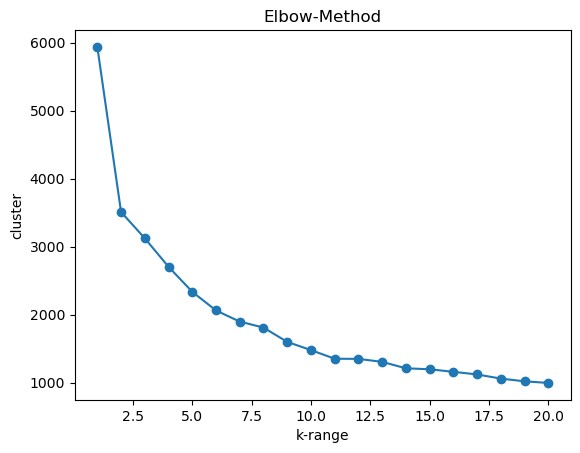

In [157]:
cl = range(1, 21)
plt.plot(cl, c,marker='o')
plt.xlabel('k-range')
plt.ylabel('cluster')
plt.title('Elbow-Method')
plt.show()